# 1. Import and Install Dependencies

In [2]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model for detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities for draw them

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [16]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks,mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                              ) 
#     # Draw right hand connections  
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [84]:
# cv2.cvtColor??

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_styled_landmarks(image, results)

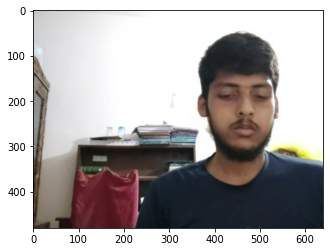

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
len(pose)

33

In [22]:
#flatten amke 1d array
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [23]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()

AttributeError: 'NoneType' object has no attribute 'landmark'

In [24]:
lh

NameError: name 'lh' is not defined

In [25]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
lh

NameError: name 'lh' is not defined

In [26]:
np.zeros(21*3) # so that it will not give us error if a lanmark is absent

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
#finally

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [28]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [30]:
extract_keypoints(results).shape

(126,)

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

# 4. Setup Folders for Collection

In [47]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['on', 'off'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 15

In [48]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you


In [49]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [50]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [54]:
label_map = {label:num for num, label in enumerate(actions)}

In [56]:
label_map 

{'on': 0, 'off': 1}

In [57]:
sequences, labels = [], [] #2 blank array represent x y data label
#each of action
for action in actions: 
    #each of no_sequences
    for sequence in range(no_sequences):
        window = [] # represents differnt of frames for particular  sequences
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [58]:
np.array(sequences).shape

(30, 15, 126)

In [59]:
np.array(labels).shape

(30,)

In [60]:
X = np.array(sequences)

In [61]:
X.shape

(30, 15, 126)

In [63]:
y = to_categorical(labels).astype(int)

In [49]:
# y

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [65]:

y_test.shape


(2, 2)

# 7. Build and Train LSTM Neural Network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense #LSTM temporal action detect and fully connected layer
from tensorflow.keras.callbacks import TensorBoard  #for logging

In [67]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [68]:
model = Sequential() #Sequential API
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,126))) #64 lstm units
model.add(LSTM(128, return_sequences=True, activation='relu'))#128 lstm units
model.add(LSTM(64, return_sequences=False, activation='relu'))  #64 lstm units #3 st of LSTM Layers False cause dense layer 
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [69]:
X.shape

(30, 15, 126)

In [70]:
actions.shape[0]

2

In [71]:
res=[.7,0.2,0.1]


In [72]:
actions[np.argmax(res)]


'on'

In [77]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) 
# model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - categorical_accuracy: 0.5357
Epoch 2/2000
1/1 [==============================] - 1s 670ms/step - loss: 0.6931 - categorical_accuracy: 0.5357
Epoch 3/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - categorical_accuracy: 0.5357
Epoch 4/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.6929 - categorical_accuracy: 0.5357
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - categorical_accuracy: 0.5357
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6928 - categorical_accuracy: 0.5357
Epoch 7/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - categorical_accuracy: 0.5357
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - categorical_accuracy: 0.5357
Epoch 9/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6926 - categorical_accuracy: 0.5357
Ep

1/1 [==============================] - 0s 21ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 75/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 76/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 77/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 78/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 79/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 80/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 81/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 82/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6907 - categorical_accuracy: 0.5357
Epoch 

1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 147/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 148/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 149/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 150/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 151/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 152/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 153/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 154/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 219/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 220/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 221/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 222/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 223/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 224/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 225/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 226/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 291/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 292/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 293/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 294/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 295/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 296/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 297/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 298/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 363/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 364/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 365/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 366/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 367/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 368/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 369/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 370/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 435/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 436/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 437/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 438/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 439/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 440/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 441/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 442/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 16ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 507/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 508/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 509/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 510/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 511/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 512/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 513/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 514/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.535

1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 579/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 580/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 581/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 582/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 583/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 584/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 585/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.5357
Epoch 586/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6906 - categorical_accuracy: 0.535

KeyboardInterrupt: 

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 203,426
Trainable params: 203,426
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [80]:
res = model.predict(X_test)

In [82]:
actions[np.argmax(res[1])]

'off'

In [83]:
actions[np.argmax(y_test[1])]

'on'

# 9. Save Weights

In [84]:
model.save('action.h7')

INFO:tensorflow:Assets written to: action.h7\assets


In [75]:

del model

In [85]:
model.load_weights('action.h7')

# 10. Evaluation using Confusion Matrix and Accuracy

In [86]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [87]:
# yhat = model.predict(X_test)
yhat = model.predict(X_test)

In [88]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()



In [89]:
yhat


[1, 1]

In [90]:
ytrue


[0, 0]

In [91]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0., 0.],
        [2., 0.]],

       [[0., 2.],
        [0., 0.]]])

In [94]:
accuracy_score(ytrue, yhat)

0.0

In [78]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  6],
        [ 4, 22]],

       [[55,  0],
        [ 1, 29]],

       [[52,  4],
        [ 5, 24]]], dtype=int64)

In [95]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [96]:
import matplotlib.pyplot as plt

In [97]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [98]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [108]:
import pyttsx3
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
# print(voices[0].id)
engine.setProperty('voice', voices[1].id)
def speak(audio):
    engine.say(audio)
    engine.runAndWait()

In [112]:
#1. New detection variables
sequence=[] #Collect 30 frames
sentence=[] #Conacdinate history togather
threshold=0.7

# cap=cv2.VideoCapture(0)
# #Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#        #Read feed
#        ret,frame=cap.read()
#        #Make detections
#        image,results=mediapipe_detection(frame,holistic)
# #        print(results)
#        #Draw Landmarks
#        draw_styled_landmarks(image,results)
        
#         # 2. Prediction logic
#        keypoints = extract_keypoints(results)
# #         sequence.insert(0,keypoints)
# #         sequence = sequence[:30]
#        sequence.append(keypoints)
#        sequence = sequence[-30:]
        
#        if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
            
        
#        #Show to screen
#        cv2.imshow('OpenCV Feed',image)
#        #Break gracefully
#       if cv2.waitkey(10)&0xFF == ord('q'):
#              break
#     cap.release()
#     cv2.destroyAllwindows()
    
    
# 1. New detection variables
# sequence = []
# sentence = []
# threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: #current sent doest not == last sentence
                        sentence.append(actions[np.argmax(res)]) # no duplicate sentence
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
        if  len(sentence) == 0:   
            cv2.rectangle(image, (0,0), (100, 60), (0,0,0), -1)
            cv2.putText(image, ' '.join(sentence), (5,50), 
                           cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3, cv2.LINE_AA)
        else:
            cv2.rectangle(image, (0,0), (100, 60), (0,0,0), -1)
            cv2.putText(image, ' '.join(sentence[-1]), (5,50), 
                           cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3, cv2.LINE_AA)
        if np.argmax(res) == 0:
            speak("Please trun off the light")
        else:
            speak("Please trun on the light")
            
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [106]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)

In [111]:
(no_sequences,30,1662)

(30, 30, 1662)

In [112]:
model.predict(np.expand_dims(X_test[0],axis=0)) # predict 1 sequence at a time


array([[1.34041430e-02, 1.18546595e-05, 9.86584008e-01]], dtype=float32)

NameError: name 'cap' is not defined

In [109]:
speak("Please trun off the light")